<a href="https://www.kaggle.com/code/andymejia/wages-through-the-years?scriptVersionId=148482429" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/poverty-level-wages-in-the-usa-dataset-1973-2022/poverty_level_wages.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/poverty-level-wages-in-the-usa-dataset-1973-2022/poverty_level_wages.csv')

In [4]:
df.head()

,year,annual_poverty-level_wage,hourly_poverty-level_wage,0-75%_of_poverty_wages,75-100%_of_poverty_wages,share_below_poverty_wages,100-125%_of_poverty_wages,125-200%_of_poverty_wages,200-300%_of_poverty_wages,300%+_of_poverty_wages,...,women_300%+_of_poverty_wages,white_share_below_poverty_wages,white_men_share_below_poverty_wages,white_women_share_below_poverty_wages,black_share_below_poverty_wages,black_men_share_below_poverty_wages,black_women_share_below_poverty_wages,hispanic_share_below_poverty_wages,hispanic_men_share_below_poverty_wages,hispanic_women_share_below_poverty_wages
0,2022,27733,13.33,4.7,7.5,12.2,15.2,32.7,19.5,20.4,...,16.7,10.7,8.1,13.5,16.2,14.5,17.7,15.4,12.3,19.2
1,2021,25688,12.35,3.8,9.1,12.9,15.0,30.3,20.4,21.5,...,17.4,11.1,8.7,13.8,18.0,15.7,19.9,16.8,14.2,20.0
2,2020,24544,11.80,3.4,8.6,12.0,13.0,31.5,20.8,22.6,...,18.1,10.4,7.9,13.1,18.1,15.4,20.5,14.9,12.0,18.6
3,2019,24242,11.65,4.4,11.3,15.7,14.2,31.2,18.7,20.3,...,16.0,13.4,10.5,16.6,22.3,19.2,24.9,19.7,15.8,24.6
4,2018,23809,11.45,5.0,13.0,18.1,14.2,29.3,19.1,19.4,...,15.2,15.0,11.6,18.7,26.0,23.1,28.5,24.3,19.3,30.7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   year                                      50 non-null     int64  
 1   annual_poverty-level_wage                 50 non-null     int64  
 2   hourly_poverty-level_wage                 50 non-null     float64
 3   0-75%_of_poverty_wages                    50 non-null     float64
 4   75-100%_of_poverty_wages                  50 non-null     float64
 5   share_below_poverty_wages                 50 non-null     float64
 6   100-125%_of_poverty_wages                 50 non-null     float64
 7   125-200%_of_poverty_wages                 50 non-null     float64
 8   200-300%_of_poverty_wages                 50 non-null     float64
 9   300%+_of_poverty_wages                    50 non-null     float64
 10  men_0-75%_of_poverty_wages              

In [6]:
df.describe()

,year,annual_poverty-level_wage,hourly_poverty-level_wage,0-75%_of_poverty_wages,75-100%_of_poverty_wages,share_below_poverty_wages,100-125%_of_poverty_wages,125-200%_of_poverty_wages,200-300%_of_poverty_wages,300%+_of_poverty_wages,...,women_300%+_of_poverty_wages,white_share_below_poverty_wages,white_men_share_below_poverty_wages,white_women_share_below_poverty_wages,black_share_below_poverty_wages,black_men_share_below_poverty_wages,black_women_share_below_poverty_wages,hispanic_share_below_poverty_wages,hispanic_men_share_below_poverty_wages,hispanic_women_share_below_poverty_wages
count,50.00000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1997.50000,15482.06000,7.443400,8.550000,15.402000,23.958000,13.652000,29.246000,19.440000,13.708000,...,8.714000,21.288000,15.19200,28.472000,31.464000,26.228000,36.424000,34.958000,29.844000,42.514000
std,14.57738,6184.85039,2.973518,3.342384,2.943862,4.321332,1.074233,1.496964,0.743955,4.098225,...,4.911877,4.423713,2.78757,7.457418,5.659731,4.676255,7.839579,6.932888,7.103209,8.022952
min,1973.00000,4701.00000,2.260000,3.400000,7.500000,12.000000,11.400000,26.700000,17.800000,8.200000,...,2.300000,10.400000,7.90000,13.100000,16.200000,14.500000,17.700000,14.900000,12.000000,18.600000
25%,1985.25000,10717.00000,5.152500,6.225000,13.925000,21.300000,12.900000,28.125000,18.825000,10.175000,...,3.725000,18.150000,13.62500,22.825000,27.225000,23.225000,30.350000,33.150000,26.250000,39.600000
50%,1997.50000,15313.50000,7.360000,7.250000,15.250000,24.950000,13.600000,29.000000,19.550000,12.850000,...,8.400000,22.050000,14.95000,28.800000,33.000000,25.500000,37.000000,35.950000,29.700000,45.800000
75%,2009.75000,20566.50000,9.887500,12.000000,16.475000,27.500000,14.475000,30.300000,19.900000,16.800000,...,12.800000,24.925000,17.37500,35.225000,36.050000,30.125000,42.550000,38.900000,34.175000,47.775000
max,2022.00000,27733.00000,13.330000,14.800000,22.500000,29.800000,15.600000,32.900000,20.800000,22.600000,...,18.100000,27.700000,19.70000,38.700000,39.400000,33.800000,50.600000,44.800000,41.400000,52.800000


In [7]:
df.columns

Index(['year', 'annual_poverty-level_wage', 'hourly_poverty-level_wage',
       '0-75%_of_poverty_wages', '75-100%_of_poverty_wages',
       'share_below_poverty_wages', '100-125%_of_poverty_wages',
       '125-200%_of_poverty_wages', '200-300%_of_poverty_wages',
       '300%+_of_poverty_wages', 'men_0-75%_of_poverty_wages',
       'men_75-100%_of_poverty_wages', 'men_share_below_poverty_wages',
       'men_100-125%_of_poverty_wages', 'men_125-200%_of_poverty_wages',
       'men_200-300%_of_poverty_wages', 'men_300%+_of_poverty_wages',
       'women_0-75%_of_poverty_wages', 'women_75-100%_of_poverty_wages',
       'women_share_below_poverty_wages', 'women_100-125%_of_poverty_wages',
       'women_125-200%_of_poverty_wages', 'women_200-300%_of_poverty_wages',
       'women_300%+_of_poverty_wages', 'white_share_below_poverty_wages',
       'white_men_share_below_poverty_wages',
       'white_women_share_below_poverty_wages',
       'black_share_below_poverty_wages',
       'black_men_sha

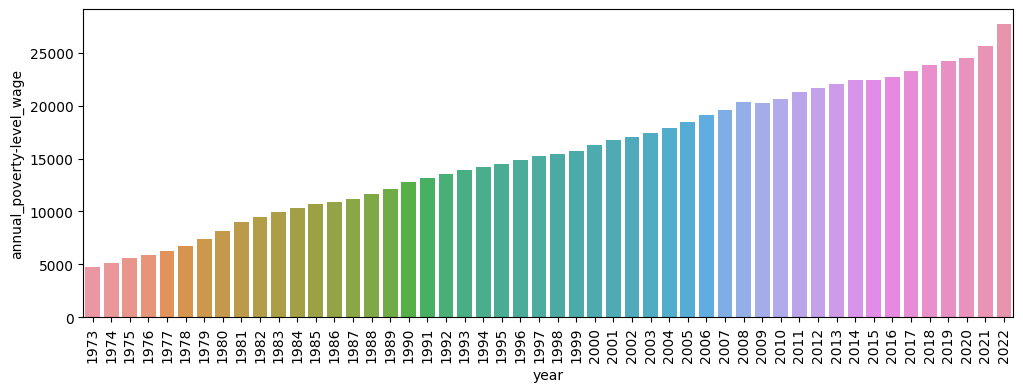

In [8]:
plt.figure(figsize=(12,4))
sns.barplot(x=df['year'], y=df['annual_poverty-level_wage'])
plt.xticks(rotation=90)
plt.show()

In [9]:
hourly_year = df.groupby('hourly_poverty-level_wage').mean()
print(hourly_year)

                             year  annual_poverty-level_wage  \
hourly_poverty-level_wage                                      
2.26                       1973.0                     4701.0   
2.48                       1974.0                     5158.0   
2.69                       1975.0                     5595.0   
2.84                       1976.0                     5914.0   
3.02                       1977.0                     6284.0   
3.23                       1978.0                     6718.0   
3.54                       1979.0                     7360.0   
3.93                       1980.0                     8181.0   
4.31                       1981.0                     8956.0   
4.57                       1982.0                     9499.0   
4.76                       1983.0                     9901.0   
4.96                       1984.0                    10317.0   
5.13                       1985.0                    10670.0   
5.22                       1986.0       

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   year                                      50 non-null     int64  
 1   annual_poverty-level_wage                 50 non-null     int64  
 2   hourly_poverty-level_wage                 50 non-null     float64
 3   0-75%_of_poverty_wages                    50 non-null     float64
 4   75-100%_of_poverty_wages                  50 non-null     float64
 5   share_below_poverty_wages                 50 non-null     float64
 6   100-125%_of_poverty_wages                 50 non-null     float64
 7   125-200%_of_poverty_wages                 50 non-null     float64
 8   200-300%_of_poverty_wages                 50 non-null     float64
 9   300%+_of_poverty_wages                    50 non-null     float64
 10  men_0-75%_of_poverty_wages              

In [11]:
average_income_ofH = df.groupby('year')['hispanic_share_below_poverty_wages'].mean()
print(average_income_ofH)

year
1973    34.9
1974    33.7
1975    35.0
1976    34.8
1977    36.0
1978    32.6
1979    34.6
1980    33.6
1981    37.1
1982    37.5
1983    37.4
1984    35.9
1985    40.3
1986    39.4
1987    38.7
1988    39.1
1989    39.7
1990    42.8
1991    43.4
1992    43.7
1993    42.9
1994    42.7
1995    42.6
1996    44.8
1997    43.5
1998    38.9
1999    38.9
2000    36.4
2001    37.5
2002    34.9
2003    33.3
2004    33.7
2005    33.1
2006    34.5
2007    32.7
2008    31.3
2009    31.0
2010    31.7
2011    38.3
2012    38.3
2013    38.2
2014    36.2
2015    33.5
2016    29.2
2017    28.5
2018    24.3
2019    19.7
2020    14.9
2021    16.8
2022    15.4
Name: hispanic_share_below_poverty_wages, dtype: float64


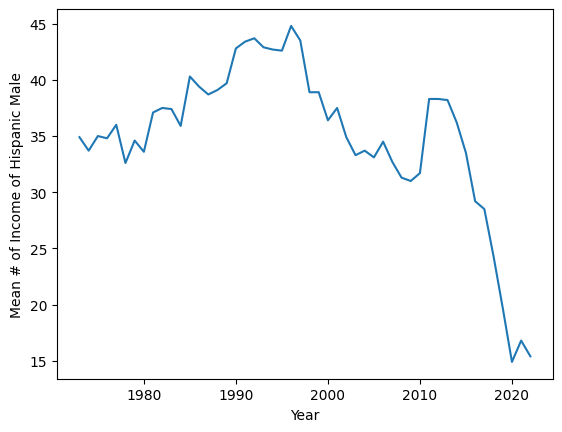

In [12]:
plt.plot(average_income_ofH.index,average_income_ofH.values )
plt.xlabel('Year')
plt.ylabel('Mean # of Income of Hispanic Male')
plt.show()

In [13]:
average_income_ofB = df.groupby('year')['black_share_below_poverty_wages'].mean()
print(average_income_ofB)

year
1973    37.3
1974    34.6
1975    36.7
1976    34.8
1977    36.7
1978    35.5
1979    33.7
1980    34.1
1981    35.7
1982    36.9
1983    36.7
1984    35.0
1985    39.4
1986    37.0
1987    36.4
1988    35.8
1989    35.7
1990    37.0
1991    36.6
1992    37.4
1993    36.1
1994    35.9
1995    33.6
1996    37.9
1997    35.4
1998    31.3
1999    30.0
2000    26.7
2001    28.8
2002    26.6
2003    25.3
2004    25.9
2005    27.1
2006    27.8
2007    26.3
2008    27.6
2009    25.7
2010    25.0
2011    31.6
2012    31.0
2013    31.9
2014    32.4
2015    31.8
2016    28.8
2017    29.1
2018    26.0
2019    22.3
2020    18.1
2021    18.0
2022    16.2
Name: black_share_below_poverty_wages, dtype: float64


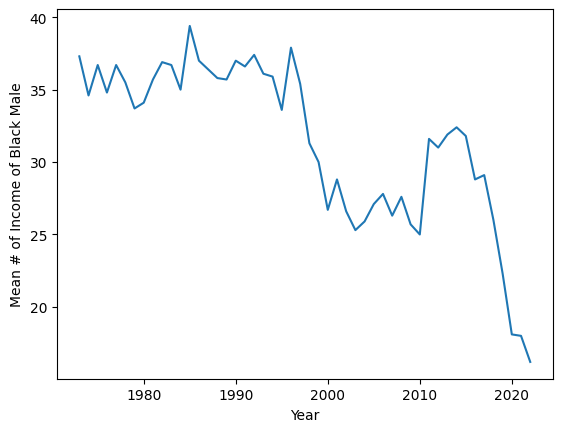

In [14]:
plt.plot(average_income_ofB.index,average_income_ofB.values )
plt.xlabel('Year')
plt.ylabel('Mean # of Income of Black Male')
plt.show()

In [15]:
average_income_ofW = df.groupby('year')['white_share_below_poverty_wages'].mean()
print(average_income_ofW)

year
1973    23.8
1974    22.7
1975    24.2
1976    23.6
1977    25.4
1978    24.5
1979    24.3
1980    24.2
1981    26.2
1982    26.6
1983    26.5
1984    24.7
1985    27.7
1986    26.2
1987    25.3
1988    25.4
1989    24.7
1990    25.5
1991    25.4
1992    25.9
1993    25.2
1994    24.7
1995    23.6
1996    25.0
1997    23.6
1998    21.4
1999    20.7
2000    19.0
2001    19.5
2002    18.3
2003    17.9
2004    18.3
2005    18.0
2006    19.0
2007    18.1
2008    18.0
2009    17.5
2010    17.5
2011    20.9
2012    20.8
2013    20.8
2014    20.2
2015    18.9
2016    17.3
2017    16.8
2018    15.0
2019    13.4
2020    10.4
2021    11.1
2022    10.7
Name: white_share_below_poverty_wages, dtype: float64


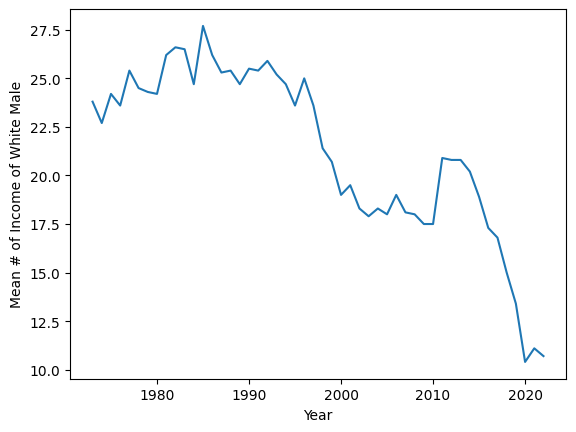

In [16]:
plt.plot(average_income_ofW.index,average_income_ofW.values )
plt.xlabel('Year')
plt.ylabel('Mean # of Income of White Male')
plt.show()

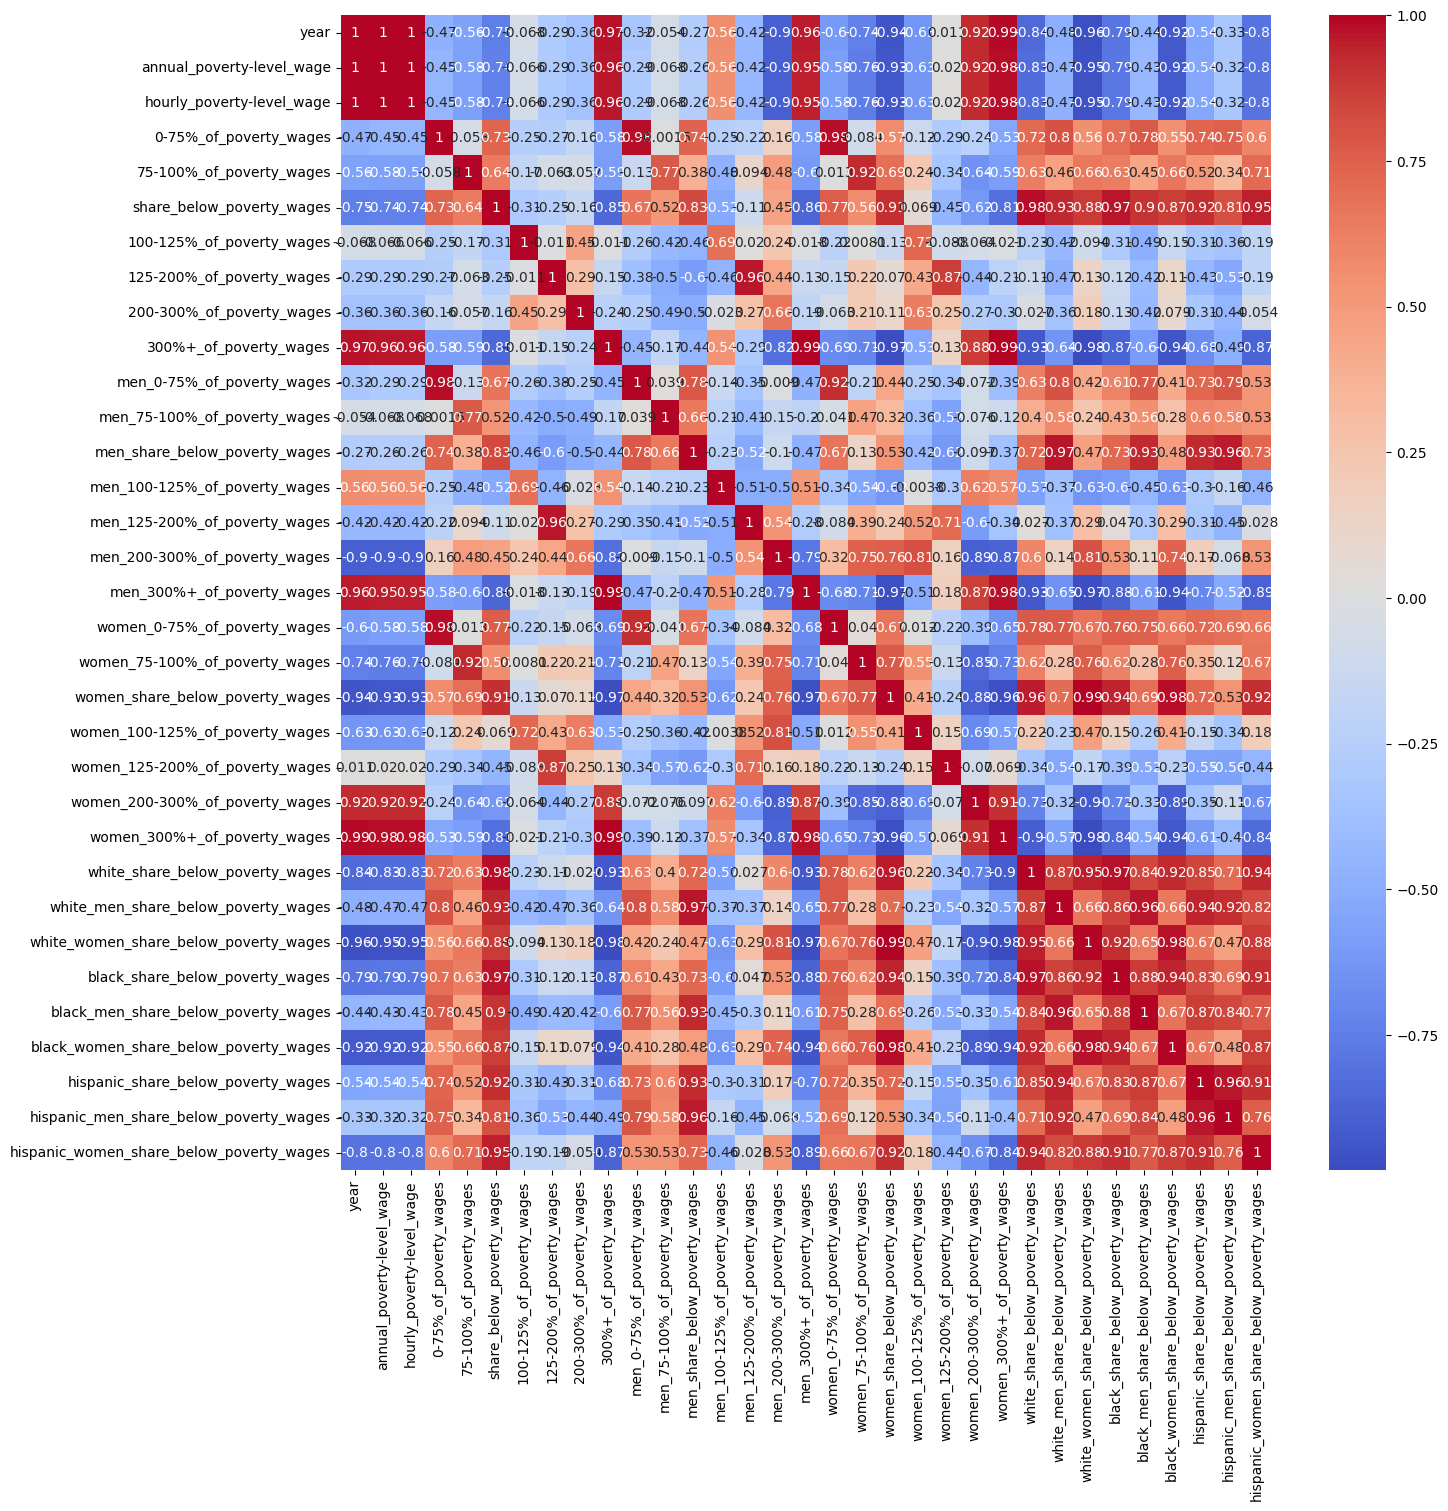

In [17]:
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [18]:
print(correlation_matrix)

                                              year  annual_poverty-level_wage  \
year                                      1.000000                   0.997493   
annual_poverty-level_wage                 0.997493                   1.000000   
hourly_poverty-level_wage                 0.997498                   1.000000   
0-75%_of_poverty_wages                   -0.473290                  -0.446886   
75-100%_of_poverty_wages                 -0.558476                  -0.575091   
share_below_poverty_wages                -0.745961                  -0.736825   
100-125%_of_poverty_wages                -0.068029                  -0.065844   
125-200%_of_poverty_wages                -0.288749                  -0.288562   
200-300%_of_poverty_wages                -0.356793                  -0.361180   
300%+_of_poverty_wages                    0.974199                   0.964709   
men_0-75%_of_poverty_wages               -0.318367                  -0.291192   
men_75-100%_of_poverty_wages

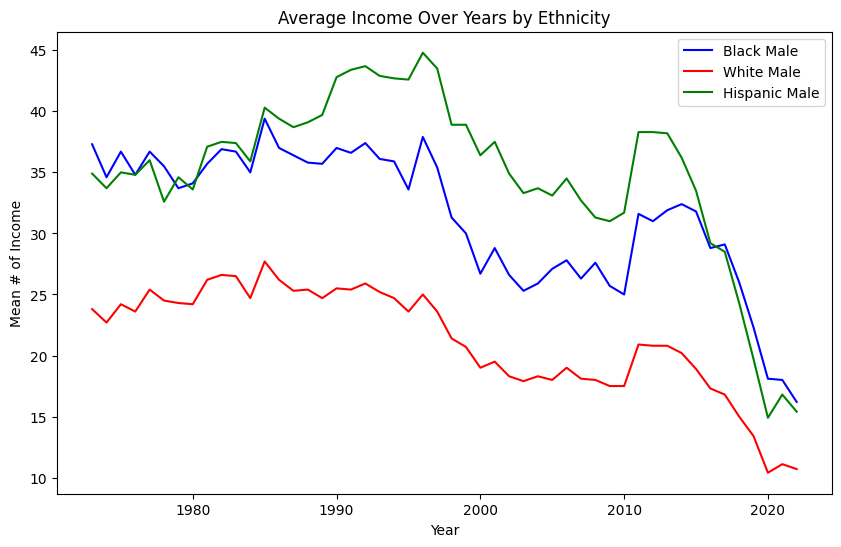

In [19]:
plt.figure(figsize=(10, 6))

plt.plot(average_income_ofB.index, average_income_ofB.values, label ='Black Male', color='blue')

plt.plot(average_income_ofW.index, average_income_ofW.values, label = 'White Male', color='red')

plt.plot(average_income_ofH.index, average_income_ofH.values, label = 'Hispanic Male', color='green')

plt.xlabel('Year')
plt.ylabel('Mean # of Income')
plt.legend()
plt.title('Average Income Over Years by Ethnicity')
plt.show()

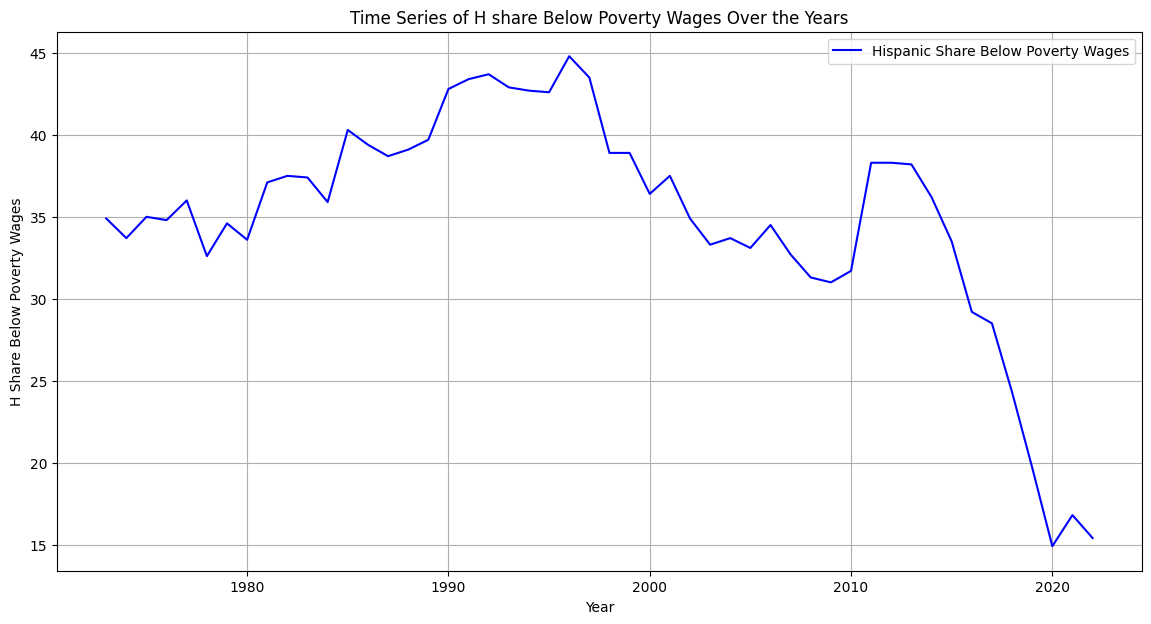

In [20]:
plt.figure(figsize=(14, 7))
plt.plot(df['year'], df['hispanic_share_below_poverty_wages'], label= 'Hispanic Share Below Poverty Wages', color='blue')
plt.title('Time Series of H share Below Poverty Wages Over the Years')
plt.xlabel('Year')
plt.ylabel('H Share Below Poverty Wages')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
#adfuller functions is from stats model which is to run Aug Dickey
from statsmodels.tsa.stattools import adfuller

#taking time series into an argument
def dickey_fuller_test(series):
    #determine lag length
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')

# Testing stationarity for hispanic_share_below_poverty_wages
dickey_fuller_test(df['hispanic_share_below_poverty_wages'])

ADF Statistic: -3.14101357503095
p-value: 0.0236631637846896
Critical Value 1%: -3.5714715250448363
Critical Value 5%: -2.922629480573571
Critical Value 10%: -2.5993358475635153


In [22]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Store the results
results = []

for param in pdq:
    try:
        model_arima = ARIMA(df['hispanic_share_below_poverty_wages'], order=param)
        model_fit = model_arima.fit()
        results.append((param, model_fit.aic))
    except:
        continue

# Find the parameters with minimal AIC value
best_params = min(results, key=lambda x: x[1])

print(f"The best parameters are: {best_params[0]} with AIC of {best_params[1]}")

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:60

The best parameters are: (0, 2, 1) with AIC of 221.9227733550931


In [23]:
#Fitting ARimina
model = ARIMA(df['hispanic_share_below_poverty_wages'], order=(0,2,1))
model_fit = model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:     hispanic_share_below_poverty_wages   No. Observations:                   50
Model:                                 ARIMA(0, 2, 1)   Log Likelihood                -108.961
Date:                                Sun, 29 Oct 2023   AIC                            221.923
Time:                                        17:36:26   BIC                            225.665
Sample:                                             0   HQIC                           223.337
                                                 - 50                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8846      0.117     -7.558      0.000      -1.114      -0.655
sigma2         5.3143      0.760      6.989      0.000       3.824       6.804
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                11.21
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                            -0.66
Prob(H) (two-sided):                  0.13   Kurtosis:                         4.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
#Splitting the data
train = df['hispanic_share_below_poverty_wages'][:40]
test = df['hispanic_share_below_poverty_wages'][40:]

In [25]:
# Fitting the ARIMA model
model = ARIMA(train, order=(0,2,1))
model_fit = model.fit()

In [26]:
#forecasting
forecast_steps = 20
forecast = model_fit.forecast(steps=forecast_steps)

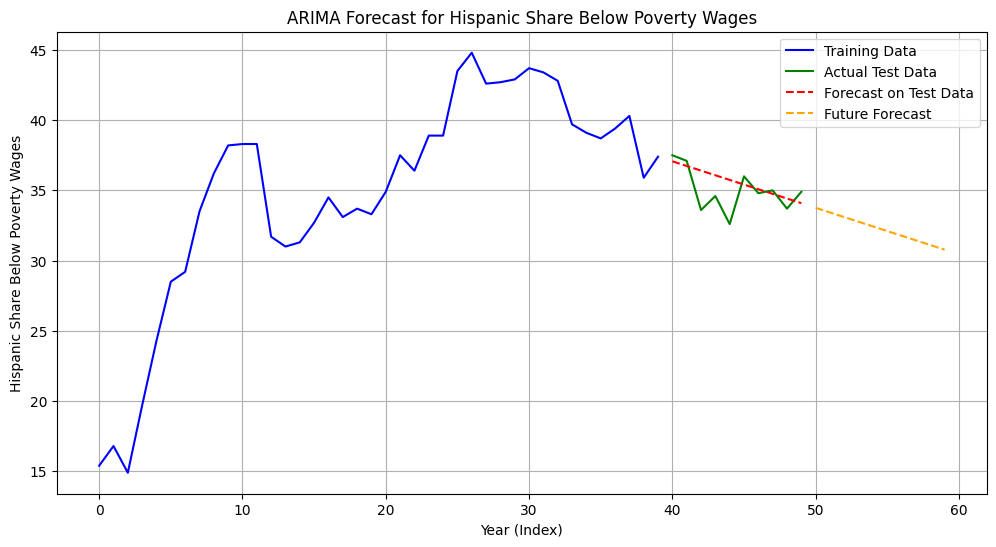

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(train, label="Training Data", color="blue")
plt.plot(test.index, test, label="Actual Test Data", color="green")
plt.plot(test.index, forecast[:10], label="Forecast on Test Data", color="red", linestyle="--")
plt.plot(range(50, 60), forecast[10:], label="Future Forecast", color="orange", linestyle="--")
plt.title("ARIMA Forecast for Hispanic Share Below Poverty Wages")
plt.xlabel("Year (Index)")
plt.ylabel("Hispanic Share Below Poverty Wages")
plt.legend()
plt.grid(True)
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [29]:
y_test = test
y_pred = forecast[:len(test)]

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 1.0868921233184898
Mean Squared Error: 2.192284360189972
R^2 Score: -0.030402500559302936
